In [1]:
from matplotlib import pyplot
import numpy as np

# Будем решать систему вида:
# y_1' = f_1(t,y_1,...,y_n)
# ...
# y_n' = f_n(t, y_1,...,y_n)

def RungeKutt1(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h * k1[j] for j in range(system_size)])
        t += h
    return np.transpose(result)

def RungeKutt2(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k1[k] * h / 2 for k in range(system_size)]
        k2 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h * k2[j] for j in range(system_size)])
        t += h
    return np.transpose(result)


def RungeKutt4(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k1[k] * h / 2 for k in range(system_size)]
        k2 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k2[k] * h / 2 for k in range(system_size)]
        k3 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h] + [result[-1][k] + k3[k] * h for k in range(system_size)]
        k4 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h / 6 * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j]) for j in range(system_size)])
        t += h
    return np.transpose(result)


Система:

$$
\left\{\begin{array}{lcl} y_1' = y_1-y_2+y_3 \\ y_2'= y_1+y_2-y_3 \\ y_3' = 2y_1-y_2  \end{array}\right.,\ y_1(0) = 1,\ y_2(0) = 4,\ y_3(0) = 7
$$

Аналитическое решение:

$$
\left\{\begin{array}{lcl} y_1 = e^{t} - e^{-t} + e^{2t} \\ y_2 = e^{t} + 3e^{-t} \\ y_3 = e^{t} + 5e^{-t} + e^{2t} \end{array}\right.
$$

In [2]:
funcs = [
    lambda t, y1, y2, y3: y1 - y2 + y3,
    lambda t, y1, y2, y3: y1 + y2 - y3,
    lambda t, y1, y2, y3: 2 * y1 - y2
]

t0 = 0
initial = [1, 4, 7]
N = 200
h = 0.01
args = [i * h for i in range(N)]

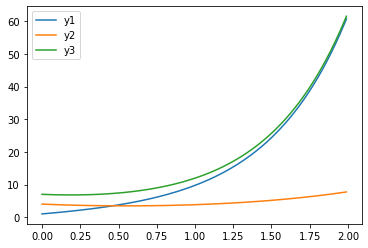

In [3]:
result0 = [
    list(map(lambda t: np.exp(t) - np.exp(-t) + np.exp(2 * t), args)),
    list(map(lambda t: np.exp(t) + 3 * np.exp(-t), args)),
    list(map(lambda t: np.exp(t) + 5 * np.exp(-t) + np.exp(2 * t), args))
]

fig, ax = pyplot.subplots()
for i in range(len(result0)):
    ax.plot(args, result0[i], label="y" + str(i + 1))
ax.legend()
pyplot.show()

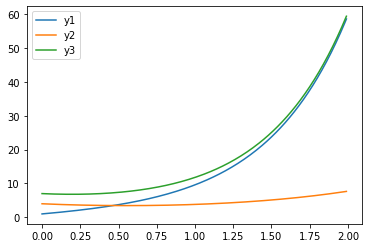

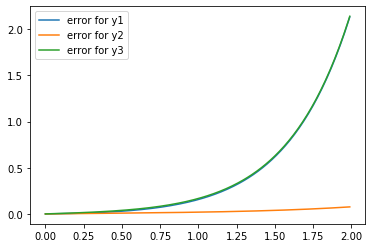

In [4]:
result1 = RungeKutt1(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
for i in range(len(result1)):
    ax.plot(args, result1[i], label="y" + str(i + 1))

ax.legend()
pyplot.show()

error1 = [[abs(result1[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error1)):
    ax.plot(args, error1[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()

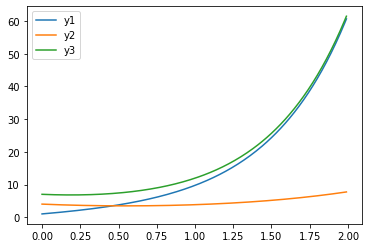

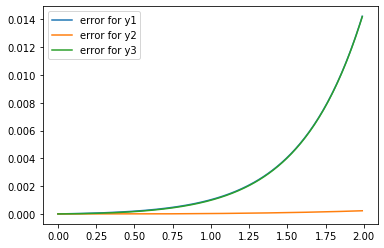

In [5]:
result2 = RungeKutt2(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
for i in range(len(result2)):
    ax.plot(args, result2[i], label="y" + str(i + 1))

ax.legend()
pyplot.show()

error2 = [[abs(result2[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error2)):
    ax.plot(args, error2[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()

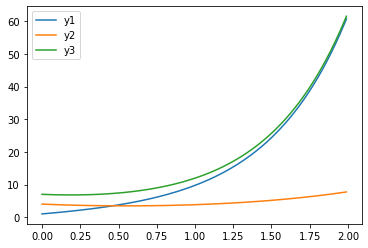

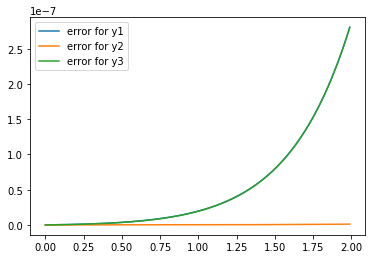

In [6]:
result4 = RungeKutt4(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
for i in range(len(result4)):
    ax.plot(args, result4[i], label="y" + str(i + 1))

ax.legend()
pyplot.show()

error4 = [[abs(result4[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error4)):
    ax.plot(args, error4[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()